# Chapter 14: Convolutional Neural Networks


## Writeup

Use the [Unit 4 Writeup](https://drive.google.com/open?id=14Je_KJmralIUCYH1_Fh1b-lGidn0hLkUlVQYEwyAW7k) to answer the questions posed in this notebook
## Walkthrough Video
​
Watch the [Chapter 14 Walkthough Video by Tom](https://youtu.be/iDiE17lk0X4)



In [1]:
# Display video link below
from IPython.lib.display import YouTubeVideo
YouTubeVideo('iDiE17lk0X4')

# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
# Use the updated Keras library from Tensorflow -- provides support for neural networks and deep learning
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

# Section 1:  Image Filters or Kernels

## The Architecture of the Visual Cortex

From *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, 2nd Edition by Aurélien Géron, ISBN-13: 978-1492032649 

> In particular, they showed that many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field. 

> Moreover, the authors showed that some neurons react only to images of horizontal lines, while others react only to lines with different orientations (two neurons may have the same receptive field but react to different line orientations).

Overview of [visual cortex from the University of Sussex](http://www.lifesci.sussex.ac.uk/home/George_Mather/Linked%20Pages/Physiol/Cortex.html)

## Convolutional Layers
> In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.

![filter imaget](https://i.stack.imgur.com/9Iu89.gif)


**Padding:** Generally when a filter is applied to an image the resulting image is slightly smaller than the original. This is because the filter cannot be applied to the pixels around the edge. A solution to this is to add extra pixels around the image that are either all 0's or the average of the neighboring pixes. 

**Stride:** "The shift from one receptive field to the next is called the
stride." Basically it is how many pixels a filter is shift over each time it is applied. Commonly the stride is 1 which results in an image about the same size as the original. A stride of 2 is also common and this reduces the image size by 50%.

**Filters:** Image filters, also known as kernels, are applied to an image. Filters are often 3x3 pixels and modify the image.

Review this[ visualization from Victor Powell](http://setosa.io/ev/image-kernels/)

## Task 1: Apply Image Filter

Make a copy of this [CIS 6115 Vision Filter Google sheet](https://docs.google.com/spreadsheets/d/1Ku-6gWUVZcVsmrdL8b1C5RMWwyvzOWXIck07D7XKApM/edit?usp=sharing). 

*Note: you do not have to complete the full image,  but do enought to demonstrate that you know how to apply kernels.*

Answer the following questions in the [Unit 4 Writeup](https://drive.google.com/open?id=14Je_KJmralIUCYH1_Fh1b-lGidn0hLkUlVQYEwyAW7k).

### Question 1.1: Max Pooling Filter

In your own words, describe how a 2x2 Max Pooling filter is applied to an image. How does it change the size of the image, assuming the stride is 2? How is the value of each pixel in the new image determined?

### Question 1.2: Kernel Filter

In your own words, describe how a 3x3 Kernel filter is applied to an image. How does it change the size of the image, assuming the stride is 1? How is the value of each pixel in the new image determined? What is one way of handling the pixels at the image boundary?


### Question 1.3 Vision Filter Worksheet
Submit a link to your shared copy of the  [CIS 6115 Vision Filter Google sheet](https://docs.google.com/spreadsheets/d/1Ku-6gWUVZcVsmrdL8b1C5RMWwyvzOWXIck07D7XKApM/edit?usp=sharing). *Note, you don't have to complete every pixel calculation, just enough so you learn how it works.*





# Section 2: CNN for Kaggle Digit Recognition Challenge

We will apply Convolutional Neural Networks (CNNs) to the to [Kaggle's Digit Recognition competition](https://www.kaggle.com/c/digit-recognizer/submit)..

First, we will read in the digit images from Kaggle.

In [0]:
# Read data from the actual Kaggle download files stored in a raw file in GitHub
url_kaggle_train = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/train.csv'
url_kaggle_test = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/test.csv'
  
train_kaggle = pd.read_csv(url_kaggle_train)
# Pull out the labels or output which are saved in first index
y_train_kaggle = train_kaggle.iloc[:,0].values.astype('int32')
# Convert remaining values to floats
X_train_kaggle = (train_kaggle.iloc[:,1:].values).astype('float32')
# Read the kaggle test data which is used for submissions
X_submit_kaggle = (pd.read_csv(url_kaggle_test).values).astype('float32')
#reshape as 28x28 pixel images
X_train_kaggle = X_train_kaggle.reshape(X_train_kaggle.shape[0], 28, 28)
X_submit_kaggle = X_submit_kaggle.reshape(X_submit_kaggle.shape[0], 28, 28)

print ("X_train_kaggle training data shape of 28x28 pixels greyscale: " ,X_train_kaggle.shape)
print ("X_submit_kaggle submission data shape of 28x28 pixels greyscale: : " ,X_submit_kaggle.shape)

X_train_kaggle training data shape of 28x28 pixels greyscale:  (42000, 28, 28)
X_submit_kaggle submission data shape of 28x28 pixels greyscale: :  (28000, 28, 28)


## Set up the data

**Scale Data:** Neural Networks work best with the inputs are between 0 and +1, but the grayscale images have pixel values between 0 and 255. So, each pixel value is divided by 255 to scale it.

**Reformatting: **Above we reformatted the data into 28x28 pixel arrays so we could display it. Now we are converting it back to a single list of 784 pixels. ( 28 x 28 = 784)

**Split the Data:** The training data is split with 90% used for training and 10% used for testing.

**One-Hot Encoding:** A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions.  In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

- For example, 3 would be [0,0,0,1,0,0,0,0,0,0]

In [0]:

input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

# Normalize the data so values are between 0 and 1 instead of between 0 and 255
X_train_kaggle = X_train_kaggle / 255
X_submit_kaggle = X_submit_kaggle / 255

#reshape for dense-only inputs
train_size = X_train_kaggle.shape[0]
submit_size = X_submit_kaggle.shape[0]
X_train_kaggle = X_train_kaggle.reshape(train_size, 28, 28, 1)
X_submit_kaggle = X_submit_kaggle.reshape(submit_size, 28, 28, 1)

# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train_num, y_test_num = train_test_split(X_train_kaggle, y_train_kaggle, test_size=0.1)

# A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.
# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
y_train = to_categorical(y_train_num, output_Size)
y_test = to_categorical(y_test_num, output_Size)

print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_test submission data shape of 28x28 pixels greyscale: : " ,X_test.shape)

print ("y_train training data shape of 28x28 pixels greyscale: " ,y_train.shape)
print ("y_test submission data shape of 28x28 pixels greyscale: : " ,y_test.shape)

X_train training data shape of 28x28 pixels greyscale:  (37800, 28, 28, 1)
X_test submission data shape of 28x28 pixels greyscale: :  (4200, 28, 28, 1)
y_train training data shape of 28x28 pixels greyscale:  (37800, 10)
y_test submission data shape of 28x28 pixels greyscale: :  (4200, 10)


## TensorFlow Implementation of CNN Layers

For an overview of CNNs, see [MIT 6.S191: Convolutional Neural Networks](https://youtu.be/H-HVZJ7kGI0?t=1132). While the entire video is good, the key description of CNN layers start at 19:00.

We will use the following Keras pre-built layers to build our CNN.

### Convolutional Layers
In the simplest form in a sequntial network this filter layer is:

> `Conv2D(16, (3, 3), activation='relu')`

This defines a layer of 16 filters, each one 3x3 pixels with default stride of 1

The textbook show a more complicated example on page 455:

> `conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")`

This defines a layer of 32 filters, each one 3x3 pixels with default stride of 1 and zero-padding so the resulting image is the "same" size as the original image.

### Pooling Layers
In a sequential network this layer is:

> `MaxPooling2D(pool_size=(2, 2))`

This defines a 2x2 max pooling filter with default stride of 2 which should reduce the image size by 1/2.

The textbook assigns this layer a name as shown on page 459.

> `max_pool = keras.layers.MaxPool2D(pool_size=2)`

### Flatten Layer
This layer is used to convert a 2D layer into a 1D layer for output
> `Flatten()`

### Dense Layer
This is the standard fulling connected layer we used in the last unit
> `Dense(32, activation='relu')`

One possibly configuration would be:

```
NN = Sequential()
NN.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
NN.add(Conv2D(8, (3, 3), activation='relu'))
NN.add(MaxPooling2D(pool_size=(2, 2)))
NN.add(Conv2D(16, (3, 3), activation='relu'))
NN.add(Flatten())
NN.add(Dense(32, activation='relu'))
NN.add(Dense(output_Size, activation='softmax'))
```


![alt text](https://docs.google.com/drawings/d/e/2PACX-1vQJSHiXNu_ENp5TV8Q4I4041-1W-q0QspjivlfKg_zxKnarN2izKzGmP0RUtDIZSaEQefnl5_uUDiID/pub?w=1152&h=384)

Note that each MaxPooling layer decreases our image size in half and our starting images are only 28x28 pixels. 


## Task 2: Test out the CNN 

The following cells set up the CNN, train it, and graph the results. Run all the cells in Section 2 and answer the following questions in the [Unit 4 Writeup](https://drive.google.com/open?id=14Je_KJmralIUCYH1_Fh1b-lGidn0hLkUlVQYEwyAW7k).

### Question 2.1: 

How many Trainable Parameters are in the network? This is shown when you compile the network below.

Simple networks may have 1,000 trainable weights or parameters, but large CNN's may have a few million trainable parameters or weights. 

### Question 2.2: 

This is a large data set of over 37,000 images, but the images are rather small (28x28 pixels). About how long does it take for a single training epoch--training the network on all 37,000+ images? How long does it take to train for 10 epochs?

### Question 2.3: 

After training for 10 epochs, what is the accuracy? You should list both the training accuracy (acc) and the testing accuracy (val_acc). 

Networks generally perform worse on the testing data which they have not been trained on. How does the testing accuracy compare with the training accuracy in this CNN?

In [0]:
# Set up the Neural Network
input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

NN = Sequential()
NN.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
NN.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
NN.add(MaxPooling2D(pool_size=(2, 2)))
NN.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
NN.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
NN.add(MaxPooling2D(pool_size=(2, 2)))
NN.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
NN.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
NN.add(Flatten())
NN.add(Dense(32, activation='relu'))
NN.add(Dense(output_Size, activation='softmax'))
print ("Neural Network Model created")
NN.summary()

# Compile neural network model
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Neural Network Model created
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_13 (Conv2D)       

In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=2, 
                                            factor=0.5,                                            
                                            min_lr=0.000001)

early_stops = EarlyStopping(monitor='val_loss', 
                            min_delta=0, 
                            patience=20, 
                            verbose=2, 
                            mode='auto')

checkpointer = ModelCheckpoint(filepath = 'cis6115_MNIST.{epoch:02d}-{accuracy:.6f}.hdf5',
                               verbose=2,
                               save_best_only=True, 
                               save_weights_only = True)


## Train the Neural Network

This will run all 37800 training images through the network and update the weights. 

- epochs = 10 means to run the training 10 times. You can decide if you want to try more or less training depending of the graph of your accuracy.
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
### Note: This is a large data set and training will be slow. This might take a couple of minutes to run. 

This is why we are only using 10 epochs initially

In [0]:
# Fit model on training data for network with dense input layer

history = NN.fit(X_train, y_train,
          epochs=10,                    
          verbose=1,
          callbacks=[learning_rate_reduction, early_stops],
          validation_data=(X_test, y_test))



Epoch 1/10
1182/1182 [==============================] - 34s 29ms/step - loss: 0.2300 - accuracy: 0.9291 - val_loss: 0.0891 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 2/10
1182/1182 [==============================] - 34s 29ms/step - loss: 0.0656 - accuracy: 0.9799 - val_loss: 0.0675 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 3/10
1182/1182 [==============================] - 34s 29ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0609 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 4/10
1182/1182 [==============================] - 34s 29ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.0645 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 5/10
1182/1182 [==============================] - 34s 29ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0717 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 6/10
1182/1182 [==============================] - 34s 29ms/step - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.0605 - val_accuracy: 0.9831 - lr: 0.0010
Epoch 7/10
1182/1182 [========================

## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

Running final scoring on test data
132/132 [==============================] - 1s 11ms/step - loss: 0.0681 - accuracy: 0.9848
The accuracy for this model is  0.98


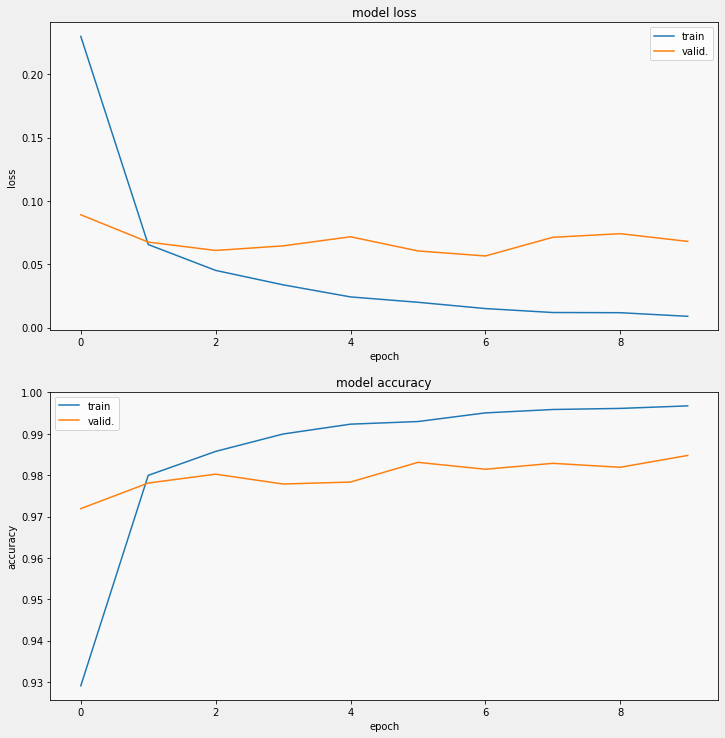

In [0]:
# Evaluate model on test data
print ("Running final scoring on test data")
score = NN.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

# We will display the loss and the accuracy of the model for each epoch
# NOTE: this is a little fancy display than is shown in the textbook
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# We store the performance during training in a variable named 'history'. The x-axis is the training time or number of epochs.
#    Accuracy: Accuracy of the predictions; hopefully this is increasing to near 1.0
#    Loss: How close the output is to the desired output; this should decrease to near 0.0
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


## Task 3: Make changes to the CNN layers

Make a change to the CNN layers and re-train the CNN noting the new accuracy. Repeat this again making another change and noting the new accuracy.

Describe what changes to the CNN layers you will make. Options include:

**Change number of filters:** Adding more or less filters in each Conv2D layer. The first parameter is the number of filters at that level. So, here is a sample layer with 8 filters

```
NN.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
```
Generally you can start with a small number of filters but you need to increase the number of filters as the size of the image is reduced.


**Add more Conv2D layer:** It is common to stack two to four Conv2D layers together. Consider adding more of these layers. Since our image starts our small, only 28x28 pixels, use `padding='same'` to keep the image from shrinking when applying mulitple filters

**Consider trying larger or smaller filters:**  While 3x3 pixel filters are common, filters range from 1x1 to 7x7.

**Try more MaxPooling2D layers:** In future CNNs we will use multiple MaxPooling layers to shrink large images down to a manageble size. You could add one more here, but we don't want our image to get too small.

*Note: You should not change the input or output layers, they are fixed by our problem definition*

## Writeup:

Describe at least two different changes you made to the CNN layers in the [Unit 4 Writeup](https://drive.google.com/open?id=14Je_KJmralIUCYH1_Fh1b-lGidn0hLkUlVQYEwyAW7k).

### Change 1: 

Describe the first change you made and why you tried it. 

### Results 1: 

Describe the results of your first change and if it improved the training or testing accuracy of your network.

### Change 2: 

Describe the second change you made and why you tried it. 

### Results 2: 

Describe the results of your second change and if it improved the training or testing accuracy of your network.


## Create the Submission for Kaggle

The following code generates a file named CIS6115_Submission.csv which you need to download to your local PC and then upload to [Kaggle's Digit Recognition competition](https://www.kaggle.com/c/digit-recognizer/submit).



In [0]:
predictions = NN.predict_classes(X_submit_kaggle, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})

submissions.to_csv("CIS6115_Submission.csv", index=False, header=True)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Kaggle Submission

Run the code above after training the network above. It will go through the 28,000 submission images and generate an prediction for each. These are saved in a file named "CIS6115_Submission.csv"

**Colab Users: ** The submission file is stored in the Colab files tied to this colab notebook in the Google cloud. 
1. Open the left-side menu by clicking on the > icon near the top-left
2. Select the file tab
3. Hit the Refresh button and the file should be displayed in the list
4. Right-click on the file and choose "Download" and save it to a folder on your PC.




## Task 4: Report Best Score


Submit your best network to the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and compare it to your original score


## Writeup:

Describe your Kaggle results in the [Unit 4 Writeup](https://drive.google.com/open?id=14Je_KJmralIUCYH1_Fh1b-lGidn0hLkUlVQYEwyAW7k).

### Question 4.1
What score did you get from your Kaggle submission? 

### Question 4.2
Singe Kaggle uses their own data set for testing the nework, the network performance reported by Kaggle is often worse than those found during training. How did your Kaggle accuracy compare with the training and testing accuracy you found?




